<a href="https://colab.research.google.com/github/cnapole/AirConditionerFuzzyLogic/blob/SimpleAirConditioner/AirCondExample4Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MISO example: 2 inputs 1 output
#The problem is: How can we control an air conditioner intensity of a metro (i.e. 1 wagon) based on the amount of people and size?
#Therefore, 2 inputs: place size (10-20 meters) and amount of people (0 - 60 people)
#Output: air conditioner intensity (0-1 normalized)
#the ouput is the
#Useful links:
#https://pythonhosted.org/scikit-fuzzy/

In [ ]:
#scikit-fuzzy instalation
!pip install -q scikit-fuzzy

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Universe of discourse definition
x_placesize = np.arange(10, 21, 1,dtype = int)
x_peopleamount = np.arange(0, 61, 1,dtype = int)

x_intensity = np.arange(0, 1.1, 0.1)

#Input fuzzy variables creation (antecedent)
PlaceSize = ctrl.Antecedent(x_placesize, 'PlaceSize')
PeopleAmount = ctrl.Antecedent(x_peopleamount, 'PeopleAmount')

#Output fuzzy variables creation (consequent)
Intensity = ctrl.Consequent(x_intensity, 'Intensity')

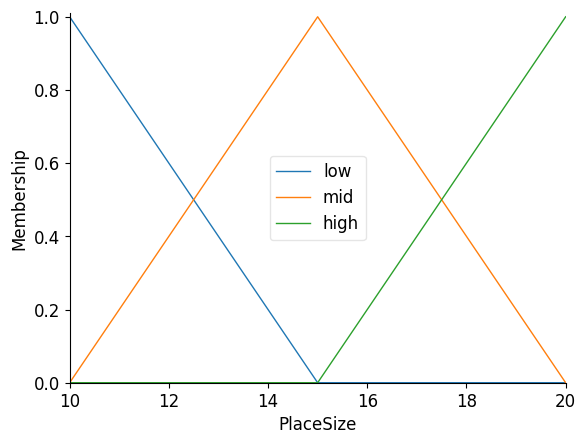

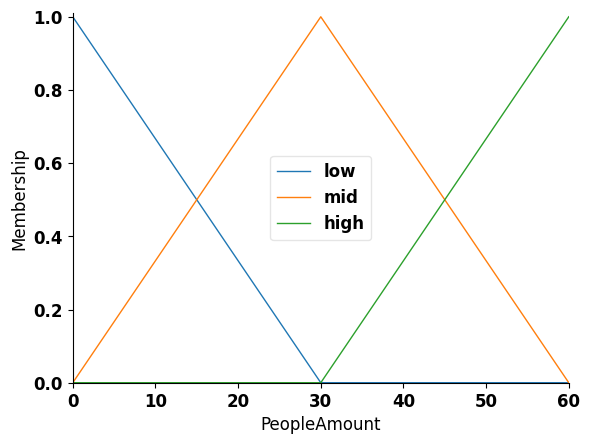

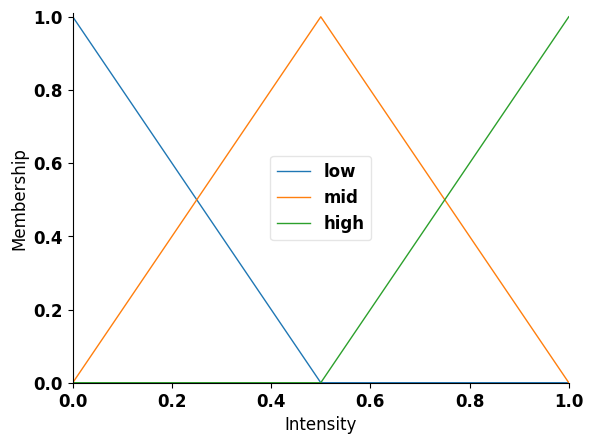

In [ ]:
#Triangular membership functions

#Placesize definition
PlaceSize['low'] = fuzz.trimf(PlaceSize.universe, [10, 10, 15])
PlaceSize['mid'] = fuzz.trimf(PlaceSize.universe, [10, 15, 20])
PlaceSize['high'] = fuzz.trimf(PlaceSize.universe, [15, 20, 20])

#PeopleAmount fuzzy sets
PeopleAmount['low'] = fuzz.trimf(PeopleAmount.universe, [0, 0, 30])
PeopleAmount['mid'] = fuzz.trimf(PeopleAmount.universe, [0, 30, 60])
PeopleAmount['high'] = fuzz.trimf(PeopleAmount.universe, [30, 60, 60])

#Intensity fuzzy sets
Intensity['low'] = fuzz.trimf(Intensity.universe, [0, 0, 0.5])
Intensity['mid'] = fuzz.trimf(Intensity.universe, [0, 0.5, 1])
Intensity['high'] = fuzz.trimf(Intensity.universe, [0.5, 1, 1])

#Let's check the rules
PlaceSize.view()
PeopleAmount.view()
Intensity.view()

In [ ]:
#Now, time to define the base rules for the inference
# The structure is (for example for the first case) "if PlaceHigh is high & PeopleAmount is high, the intensity should be high"
rule1 = ctrl.Rule(PlaceSize['high'] & PeopleAmount['high'] , Intensity['high'])
rule2 = ctrl.Rule(PlaceSize['mid'] & PeopleAmount['high'] , Intensity['high'])
rule3 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['high'] , Intensity['high'])
rule4 = ctrl.Rule(PlaceSize['mid'] & PeopleAmount['mid'] , Intensity['mid'])
rule5 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['mid'] , Intensity['mid'])
rule6 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['low'] , Intensity['low'])
rule7 = ctrl.Rule(PlaceSize['low'] & PeopleAmount['high'] , Intensity['low'])
rule8 = ctrl.Rule(PlaceSize['mid'] & PeopleAmount['low'] , Intensity['low'])
rule9 = ctrl.Rule(PlaceSize['high'] & PeopleAmount['low'] , Intensity['low'])

#Let's add all those rules in an array for further actions
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]

#Those fuzzy rules are added to the ctrl system now:
AirCondControl = ctrl.ControlSystem(rules)

0.6653209760184313


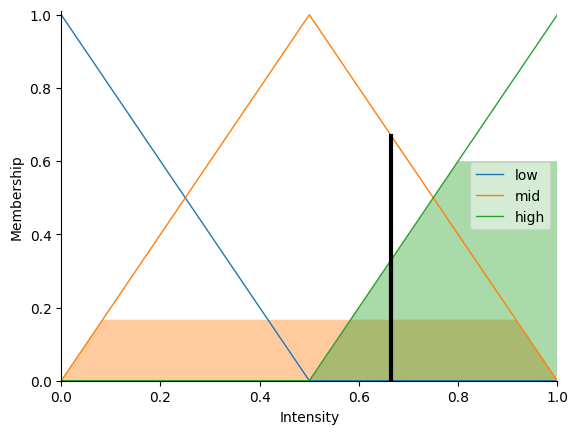

In [ ]:
#Now we create a fuzzy logic simulation environment

AirCondSim = ctrl.ControlSystemSimulation(AirCondControl)

#Evaluation:
#PlaceSize = 10 to 20
#PeopleAmount = 0 to 60

#Let's try with the values from the video's example:
AirCondSim.input['PlaceSize'] = 17
AirCondSim.input['PeopleAmount'] = 55
AirCondSim.compute()

#Output calculation based on the placesize and peopleamount:
print(AirCondSim.output['Intensity'])
Intensity.view(sim=AirCondSim)